In [1]:
%pylab inline
import pylab
import numpy as np
import math

pylab.rcParams['figure.figsize'] = 12, 12

Populating the interactive namespace from numpy and matplotlib


#Aufgabenblatt 2
## Aufgabe 1

Erzeugen des Zufallszahlengenerators

In [2]:
class KongruentZufall:
    
    def __init__(self, a, m, c):
        self.a = a
        self.m = m
        self.c = c
        self.lastX = 1
    def nextRandom(self):
        self.lastX = (self.a * self.lastX + self.c) % self.m
        if self.c == 0 and self.lastX == 0:
            print("Reset lastX to 1 weil lastX = 0")
            self.lastX = 1
            return self.nextRandom()
        if self.lastX == 1:
            raise Warning("Einmal im Kreis")
        return self.lastX/self.m
    def __str__(self):
        return "{}*x+{} % {}".format(self.a, self.c, self.m)

beispieleAusB = [
    (40692, 2147483399, 0),
    (39373, 2**31 - 1, 0),
    (205, 139968, 29573),
    (1021, 121500, 25673)
]

Ziehe $N$ Zufallszahlen aus allen Beispielgeneratoren

In [3]:
N = 10000
beispielResult = np.empty([len(beispieleAusB),N], dtype=np.float64)
for n, a in enumerate(beispieleAusB):
    r = KongruentZufall(*a)
    for i in range(N):
        beispielResult[n][i] = r.nextRandom()


## 1. c.)

Plotten der Verteilung aufeinanderfolgender Zufallszahlen

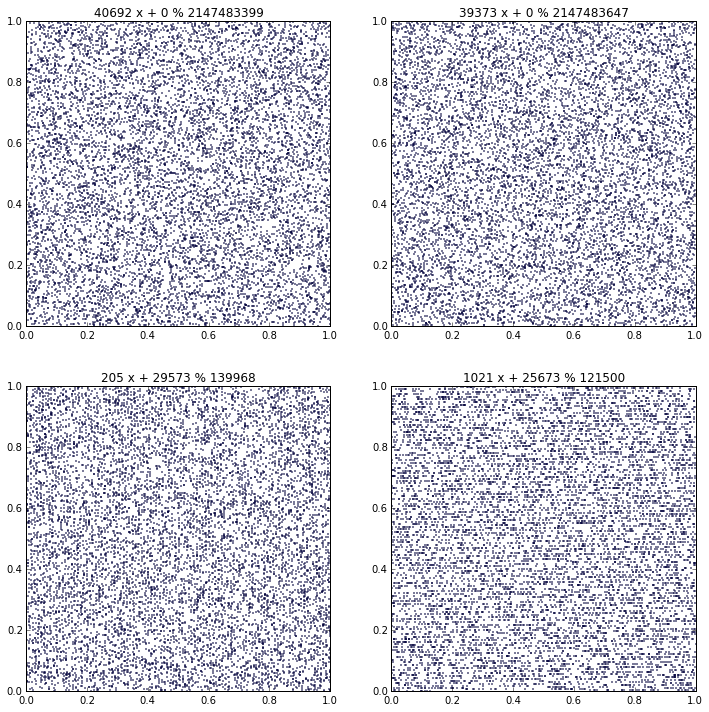

In [4]:
fig, axs = plt.subplots(2,2)
for n in range(len(beispieleAusB)):
    axs[n/2, n%2].set_title('{a} x + {c} % {m}'.format(a=beispieleAusB[n][0], m=beispieleAusB[n][1], c=beispieleAusB[n][2]))
    # Lasse für die X-Werte die erste Zufallszahl und für die Y Werte die Letzte Zufallszahl aus.
    axs[n/2, n%2].plot(beispielResult[n][:-1], beispielResult[n][1:], 'o', markersize=1)

## 1.d.)

Bestimmen der Anzahl von Treffern:

In [5]:
from collections import defaultdict

def berechneFlaechen(punkte, k):
    flaechengroesse = 2**(-k)
    anzahlFlaechen = 2**k
    f = np.zeros([anzahlFlaechen, anzahlFlaechen], dtype=np.int32)
    for x, y in zip(punkte[:-1], punkte[1:]):
        f[int(x/flaechengroesse)][int(y/flaechengroesse)] += 1
    return f

exponent = np.arange(1, 11)
teilflaechen = defaultdict(dict)
for beispiel in range(len(beispieleAusB)):
    for k in exponent:
        teilflaechen[beispiel][k] = berechneFlaechen(beispielResult[beispiel], k)



In [6]:
from IPython.display import Math,display

for n, beispiel in enumerate(beispieleAusB):
    print("Beispiel {}. a={} m={} c={}".format(n + 1, *beispiel))
    for k in exponent:
        p_k = teilflaechen[n][k].min()/teilflaechen[n][k].max()
        display(Math('p_{%d} = %f' % (k, p_k)))

Beispiel 1. a=40692 m=2147483399 c=0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Beispiel 2. a=39373 m=2147483647 c=0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Beispiel 3. a=205 m=139968 c=29573


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Beispiel 4. a=1021 m=121500 c=25673


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##### Es gibt Quadrate mit 0 Treffern (Schwarz), ab einer Zellengröße von $2^{-5}$

Insgesamt scheinen die generierten Zufallszahlen nicht besonders toll zu sein...

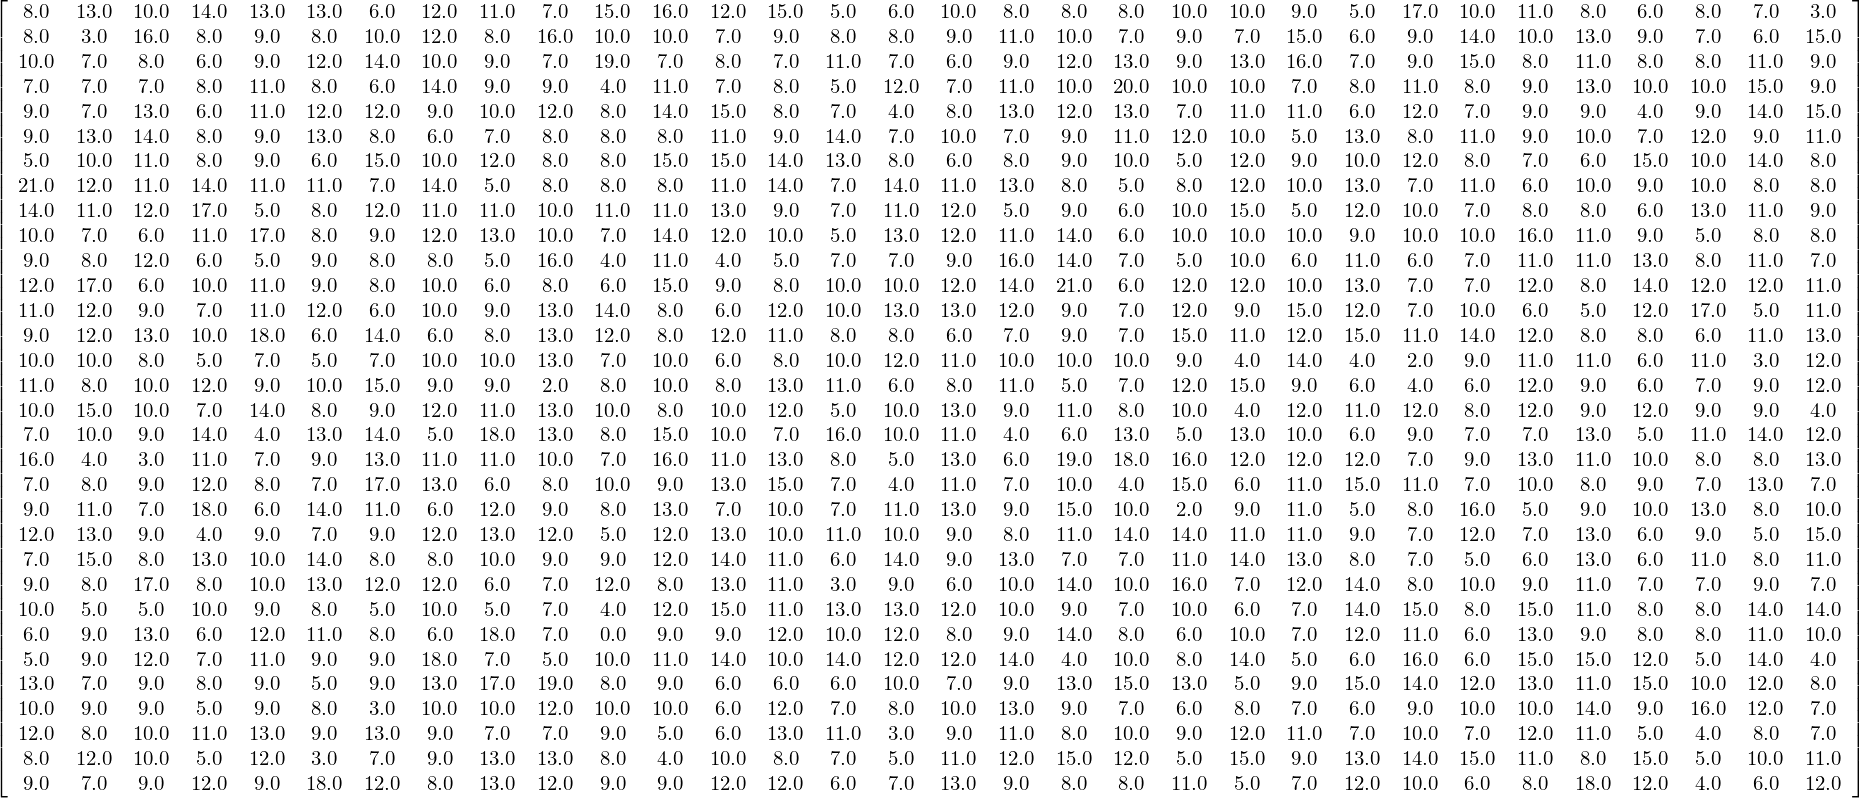

In [7]:
from sympy import init_printing, Matrix
init_printing() 

display(Matrix(teilflaechen[0][5]))

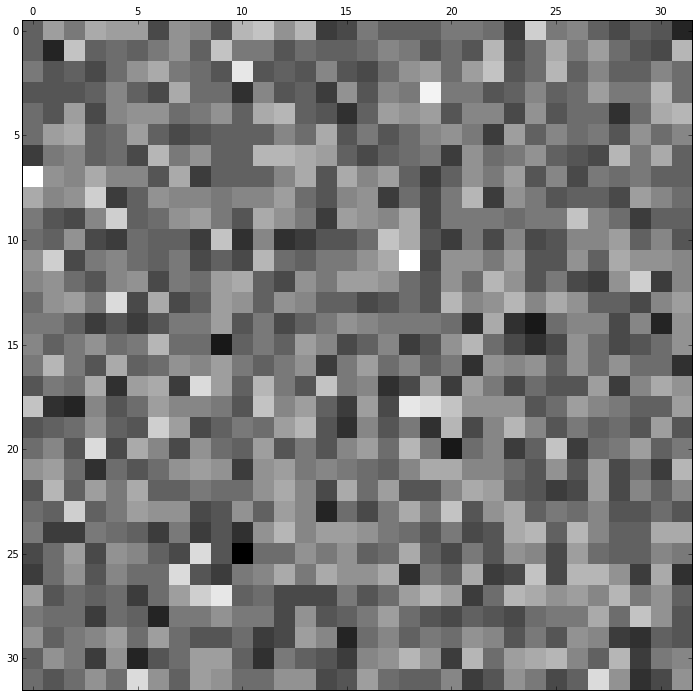

In [8]:
pylab.matshow(teilflaechen[0][5], cmap=pylab.cm.gray)

# Aufgabe 2

Konstruieren Sie Zufallszahlen durch folgenden Ausdruck
$$ X_n = \frac {S_n - n\mu} {\sigma \sqrt{n}} $$
wobei $S_n$ gegeben ist durch
$$ S_n = \sum_{i=1}^n \xi_i , \xi_i \mapsto U[0,1]$$

Dabei sind $\mu$ und $\sigma$ der Mittelwert und die Standardabweichung von gleichverteilten Zufallsvariablen $\xi$.

Welche Verteilung haben die Zufallszahlen? Variieren Sie dabei $n$ im Beriech $n = 1, \dots, 50$. Tragen sie die Verteilungen graphisch auf.

## Meine Lösung

Wähle $\sigma = \sqrt{\frac 1 {12}}$ und $\mu = \frac 1 2$ als Erwartungswert und Standardabweichung der Gleichverteilung $\mathcal{U}(0,1)$

In [9]:
class SummeVonZufallszahlen:
    def __init__(self, n):
        self.n = n
        self.mu = (0 + 1) / 2
        self.sigma = math.sqrt(1/12)
    def nextRandom(self):
        Xi = np.random.uniform(low=0, high=1, size=[self.n])
        X_n = (sum(Xi) - self.n*self.mu) / (self.sigma * math.sqrt(self.n))
        return X_n

Plotte Normalverteilung

In [10]:
#Generiere Zufallszahlen
N = 10000
ns = [1, 5, 10, 20, 30, 40, 50]
data = {}
for n in ns:
    #Ziehen der Zufallszahlen
    summeVonZufallszahlen = SummeVonZufallszahlen(n)
    data[n] = np.empty([N])
    for i in range(N):
        data[n][i] = summeVonZufallszahlen.nextRandom()

Plotten mit Histogram

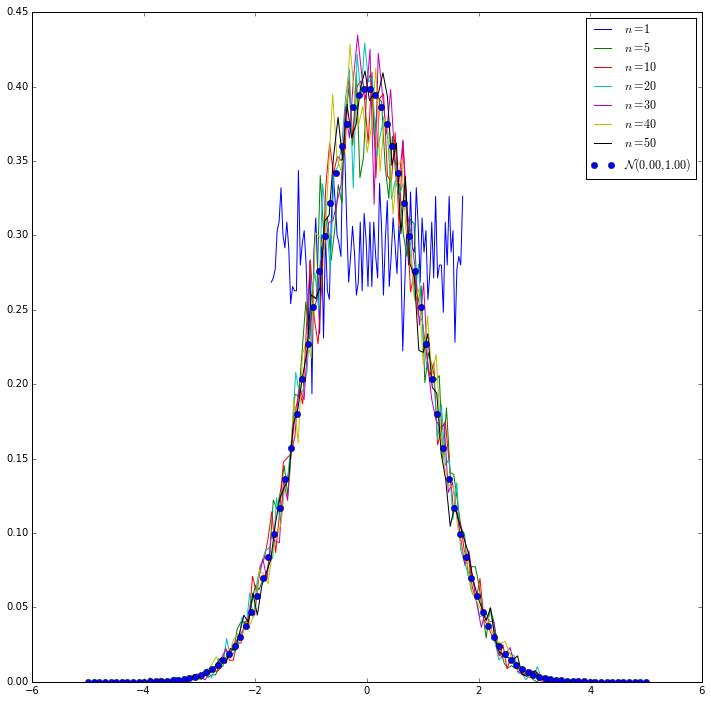

In [11]:
BINS = 100

for n in ns:
    # Zeichnen von gebinnten Daten: http://stackoverflow.com/a/8822554/2256700
    y, binEdges=np.histogram(data[n],bins=BINS, density=True) #Erzeuge Bins
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1]) #Bestimme Mittelwerte und größe
    #Plotte die bins als Linien
    pylab.plot(bincenters,y,'-', label="$n=%d$" % n)
    
mean = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-5, 5,100)
pylab.plot(x,pylab.normpdf(x,mean,sigma), 'o', label="$\mathcal{N}(%.2f, %.2f)$" % (mean, variance) )

pylab.legend()
pylab.show()

Approximiert die Normalverteilung recht gut. Durch das Histogram geht jedoch einiges an rauschen verloren.

Hier mit mehr Bins:

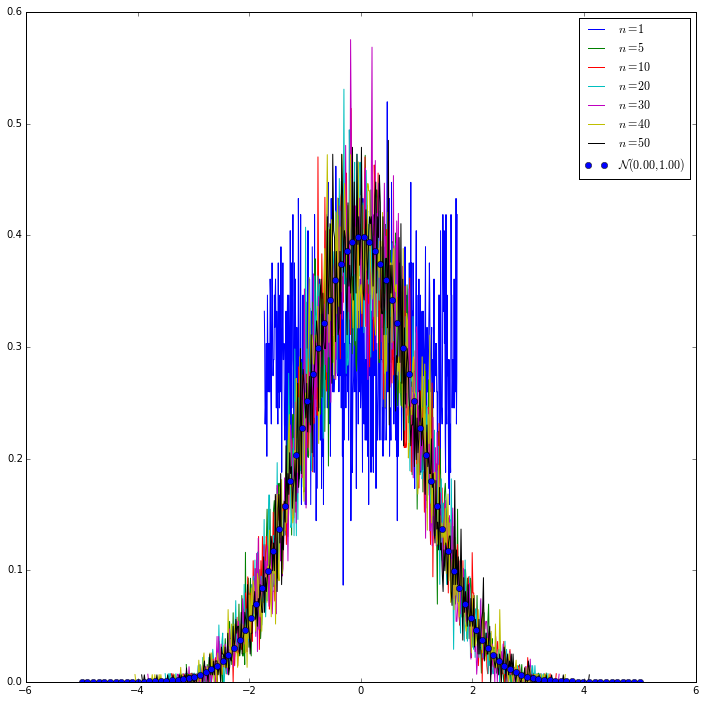

In [12]:
BINS = 500

for n in ns:
    # Zeichnen von gebinnten Daten: http://stackoverflow.com/a/8822554/2256700
    y, binEdges=np.histogram(data[n],bins=BINS, density=True) #Erzeuge Bins
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1]) #Bestimme Mittelwerte und größe
    #Plotte die bins als Linien
    pylab.plot(bincenters,y,'-', label="$n=%d$" % n)
    
mean = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-5, 5,100)
pylab.plot(x,pylab.normpdf(x,mean,sigma), 'o', label="$\mathcal{N}(%.2f, %.2f)$" % (mean, variance) )

pylab.legend()
pylab.show()